## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder

## Create a synthetic dataset

In [5]:
np.random.seed(42)
data = pd.DataFrame({
    'temperature': np.random.normal(loc=70, scale=10, size=1000),
    'vibration': np.random.normal(loc=0.5, scale=0.1, size=1000),
    'sensor_location': np.random.choice(['Zone1', 'Zone2', 'Zone3'], size=1000),
    'operational_hours': np.random.normal(loc=5000, scale=200, size=1000)
})

## Introduce MCAR missingness

In [6]:
mcar_mask = np.random.rand(1000) < 0.05
data.loc[mcar_mask, 'temperature'] = np.nan

## Introduce MAR missingness

In [7]:
mar_mask = (data['sensor_location'] == 'Zone1') & (np.random.rand(1000) < 0.1)
data.loc[mar_mask, 'vibration'] = np.nan

## Introduce MNAR missingness

In [8]:
mnar_mask = (data['operational_hours'] > 5200) & (np.random.rand(1000) < 0.2)
data.loc[mnar_mask, 'operational_hours'] = np.nan

## Visualize missing data

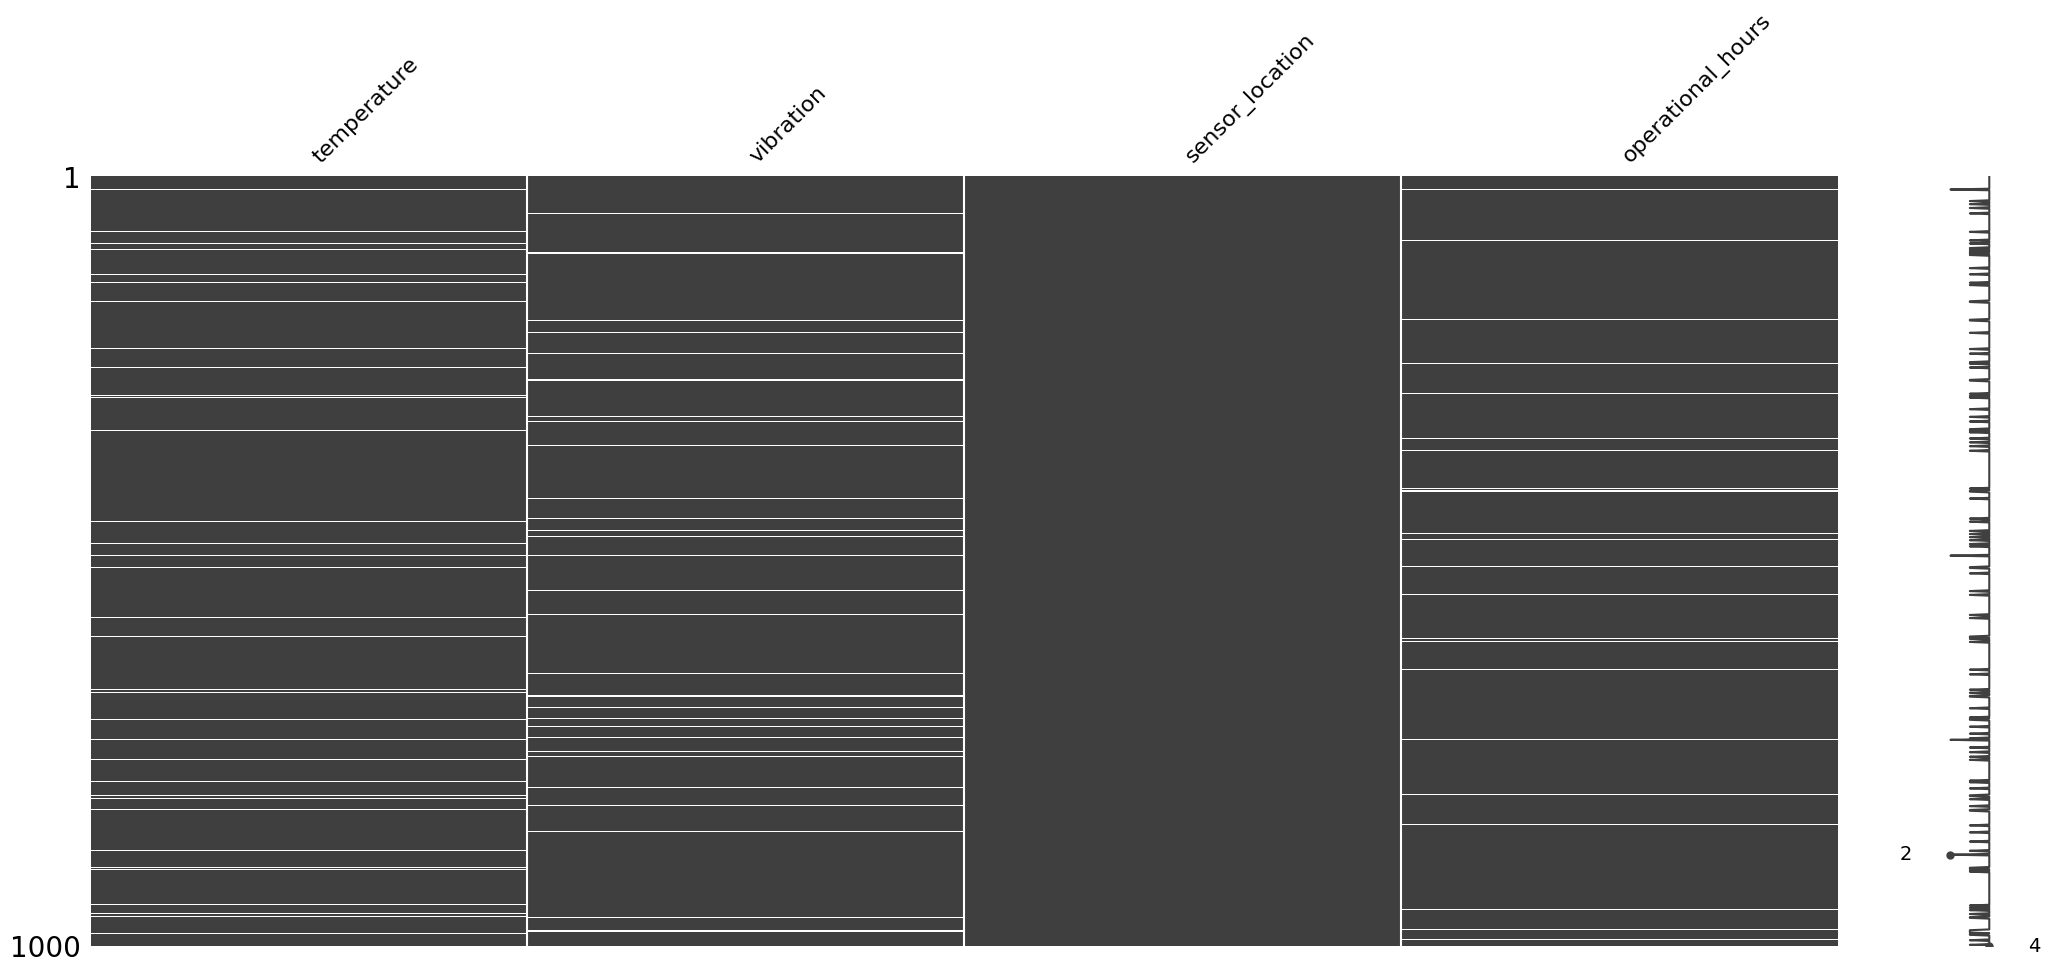

In [9]:
msno.matrix(data)
plt.show()

## Visualize missing data correlations

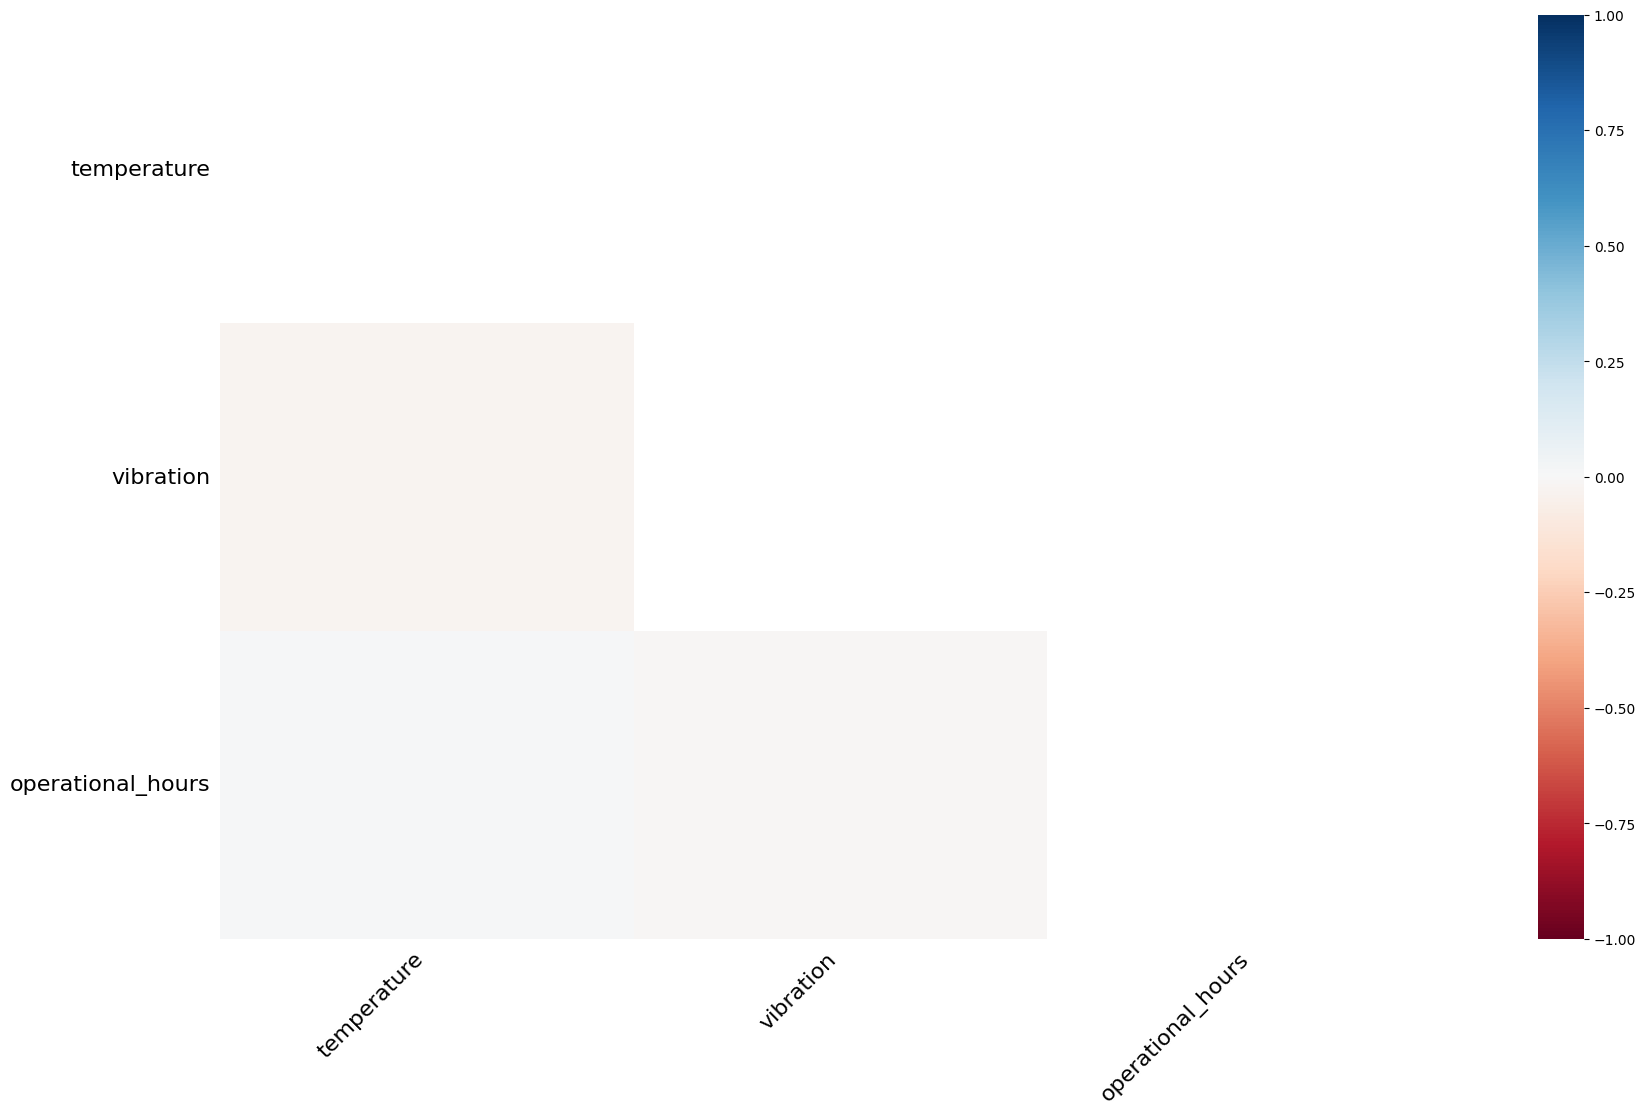

In [10]:
msno.heatmap(data)
plt.show()

## Encode categorical data

In [11]:
encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(data[['sensor_location']])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['sensor_location']))
data_encoded = pd.concat([data.drop(columns=['sensor_location']), encoded_df], axis=1)

## Handling missing data using Iterative Imputer

In [12]:
imputer = IterativeImputer(random_state=42)
data_imputed = pd.DataFrame(imputer.fit_transform(data_encoded), columns=data_encoded.columns)

## Decode the categorical data back to original form

In [13]:
decoded_df = data_imputed[encoder.get_feature_names_out(['sensor_location'])].idxmax(axis=1).str.split('_').str[-1]
data_imputed['sensor_location'] = decoded_df

## Drop the one-hot encoded columns

In [14]:
data_imputed = data_imputed.drop(columns=encoder.get_feature_names_out(['sensor_location']))

## Check the imputed data

In [15]:
print(data_imputed.head())

   temperature  vibration  operational_hours sensor_location
0    74.967142   0.639936        4926.554202           Zone2
1    68.617357   0.592463        4632.765107           Zone3
2    76.476885   0.505963        5318.946801           Zone2
3    85.230299   0.435306        4872.227694           Zone3
4    67.658466   0.569822        4955.559067           Zone3


## Visualize the imputed data distributions

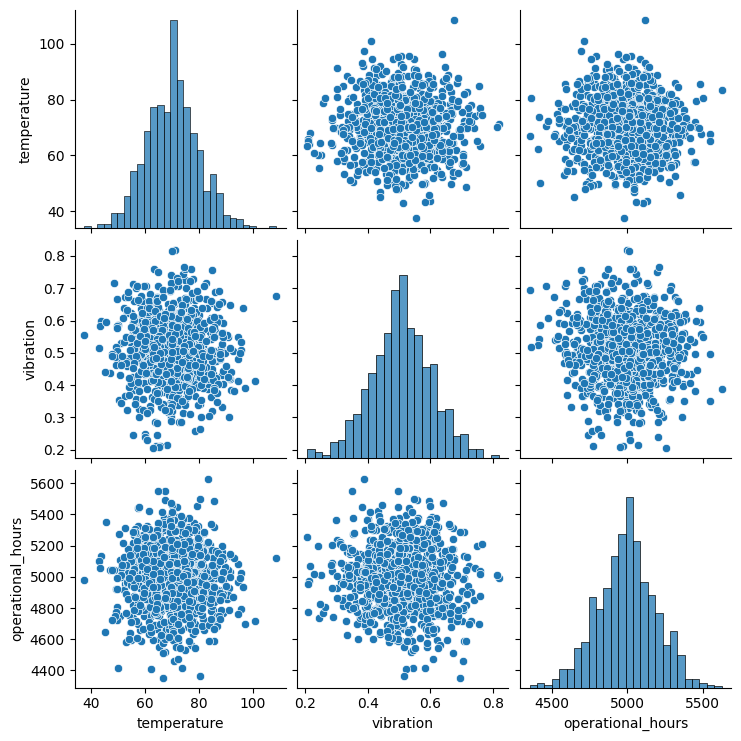

In [16]:
sns.pairplot(data_imputed)
plt.show()

## Summary statistics

In [17]:
print("Original Data Summary:")
print(data.describe())
print("\nImputed Data Summary:")
print(data_imputed.describe())

Original Data Summary:
       temperature   vibration  operational_hours
count   951.000000  959.000000         969.000000
mean     70.113067    0.507209        4991.964300
std       9.851853    0.099680         197.702581
min      37.587327    0.205961        4352.112455
25%      63.377949    0.439433        4862.208318
50%      70.139293    0.506168        4993.884196
75%      76.481992    0.573013        5124.883882
max     108.527315    0.819311        5624.379379

Imputed Data Summary:
       temperature    vibration  operational_hours
count  1000.000000  1000.000000        1000.000000
mean     70.111440     0.507146        4991.964432
std       9.607300     0.097622         194.610951
min      37.587327     0.205961        4352.112455
25%      63.764400     0.443495        4866.976898
50%      70.106993     0.505725        4991.985630
75%      76.245067     0.569727        5117.938856
max     108.527315     0.819311        5624.379379
